In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pygame

import os

#Tensorflow
import tensorflow.keras
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

from tensorflow.keras.layers import Reshape

#Sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

#Gpu
from numba import cuda

#bibliotecas para plotar graficos do keras
import pydot as pyd
import pydotplus
from pydotplus import graphviz
from tensorflow.keras.utils import plot_model, model_to_dot
tensorflow.keras.utils.pydot = pyd

from tabulate import tabulate

#checa a GPU e limpa ela
meuPc = cuda.get_current_device()
print(meuPc)
meuPc.reset()
!nvidia-smi

pygame 2.4.0 (SDL 2.26.4, Python 3.10.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


2023-06-30 19:33:11.300879: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 19:33:12.178737: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<CUDA device 0 'b'NVIDIA GeForce MX110''>
/bin/bash: /home/higor/miniconda3/envs/rna/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Fri Jun 30 19:33:13 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.41.03              Driver Version: 530.41.03    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX110            Off| 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P0               N/A /  N/A|      6MiB /  2048MiB |      2%      Default

In [2]:
nomes_colunas = ['semanas', 'mais1ano', '1a4', '5a9', '10a14', '15a19', '20a34', '35a49', '50a64', '65a79', '80mais', 'total']
nomes_colunas2 = ['mais1ano', '1a4', '5a9', '10a14', '15a19', '20a34', '35a49', '50a64', '65a79', '80mais', 'total']
dados = pd.read_csv('datasets/dataDengue.csv', sep=';', names=nomes_colunas)

dados = dados.drop(['semanas'], axis=1)

#convertando os dados para numeros inteiros
dados = dados.astype('int')

#separando nomes das colunas
x_names = [nomes_colunas[1:]]

#preparando o shape para usar no keras

serie = dados[nomes_colunas2].values.reshape(-1, 11)

print(serie.shape)
dados.head(20)

(847, 11)


,mais1ano,1a4,5a9,10a14,15a19,20a34,35a49,50a64,65a79,80mais,total
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


os dados 0 podem fornecer dados importantes sobre cada faixa etária, mas no pré-processamento de dados podem ser interpretados incorretamente, pois os dados 0 podem ser interpretados como dados ausentes, o que pode afetar o modelo de aprendizado de máquina. Podemos tentar substituir por dados especiais ou usar mascaras de sequencia. so vou saber quando ver a lstm funcionando

In [3]:
serie[:, 0] #todas as linhas da coluna 0(exclui o indice)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
serie[:14]     #se observar no dataframe acima ta puxando tudo ate a 15 semana

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 3, 2, 0, 0, 7],
       [0, 0, 0, 1, 1, 4, 2, 0, 0, 0, 8]])

## Analisando dados

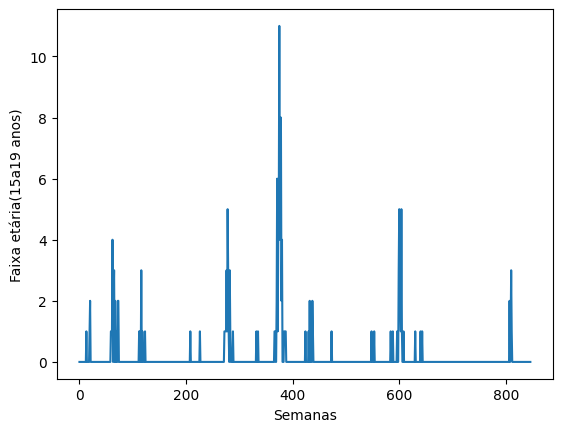

In [5]:
plt.plot(serie[:, 3])         #plota a coluna 4 no caso 15a19 anos 
#plt.plot(serie[:, 5])         #plota a coluna 6 no caso 20a34 anos
plt.xlabel("Semanas")
plt.ylabel("Faixa etária(15a19 anos)")
plt.show()


In [6]:
def plotFxEtaria(serie, coluna):
    plt.plot(serie)
    plt.xlabel("Semanas")
    plt.ylabel("Faixa etária: "+str(coluna)+" anos")
    plt.show()

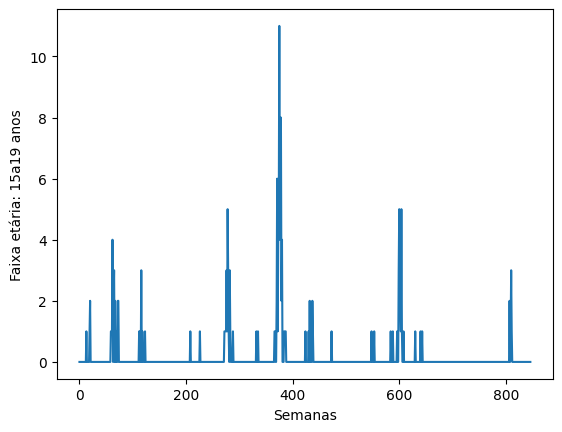

In [7]:
plotFxEtaria(serie[:, 3], '15a19')

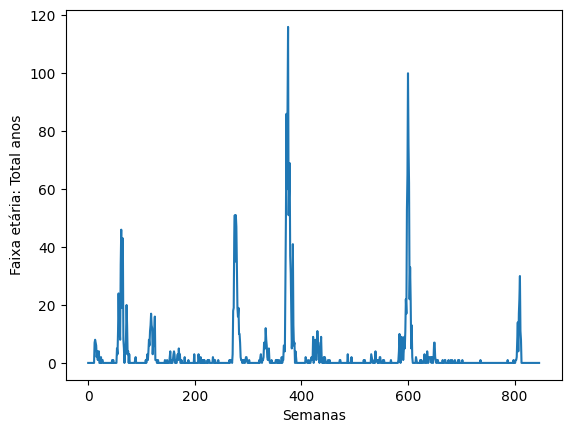

In [8]:
plotFxEtaria(serie[:, 10], 'Total')

In [9]:
def sumarizacao(serie, column):       #algumas estatisticas basicas para cada coluna (esta ok)
    stats = []

    maximum = round(np.max(serie), 2)
    minimum = round(np.min(serie), 2)
    mean = round(np.mean(serie), 2)
    median = round(np.median(serie), 2)
    std = round(np.std(serie), 2)
    stats.append([column, maximum, minimum, mean, median, std])

    headers = ['Coluna', 'Máximo', 'Mínimo', 'Média', 'Mediana', 'Desvio Padrão']

    table = tabulate(stats, headers, tablefmt="pipe")
    print(table)

sumarizacao(serie[:, 3], '15a19')


| Coluna   |   Máximo |   Mínimo |   Média |   Mediana |   Desvio Padrão |
|:---------|---------:|---------:|--------:|----------:|----------------:|
| 15a19    |       11 |        0 |    0.19 |         0 |             0.8 |


In [10]:
sumarizacao(serie[:, 10], 'Total')

| Coluna   |   Máximo |   Mínimo |   Média |   Mediana |   Desvio Padrão |
|:---------|---------:|---------:|--------:|----------:|----------------:|
| Total    |      116 |        0 |     3.2 |         0 |           10.86 |


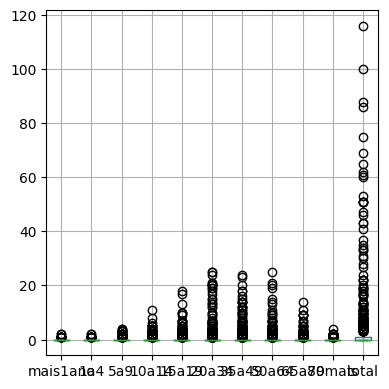

In [11]:
dados.boxplot(column=nomes_colunas2, figsize=(4, 4))
plt.tight_layout()
plt.show()

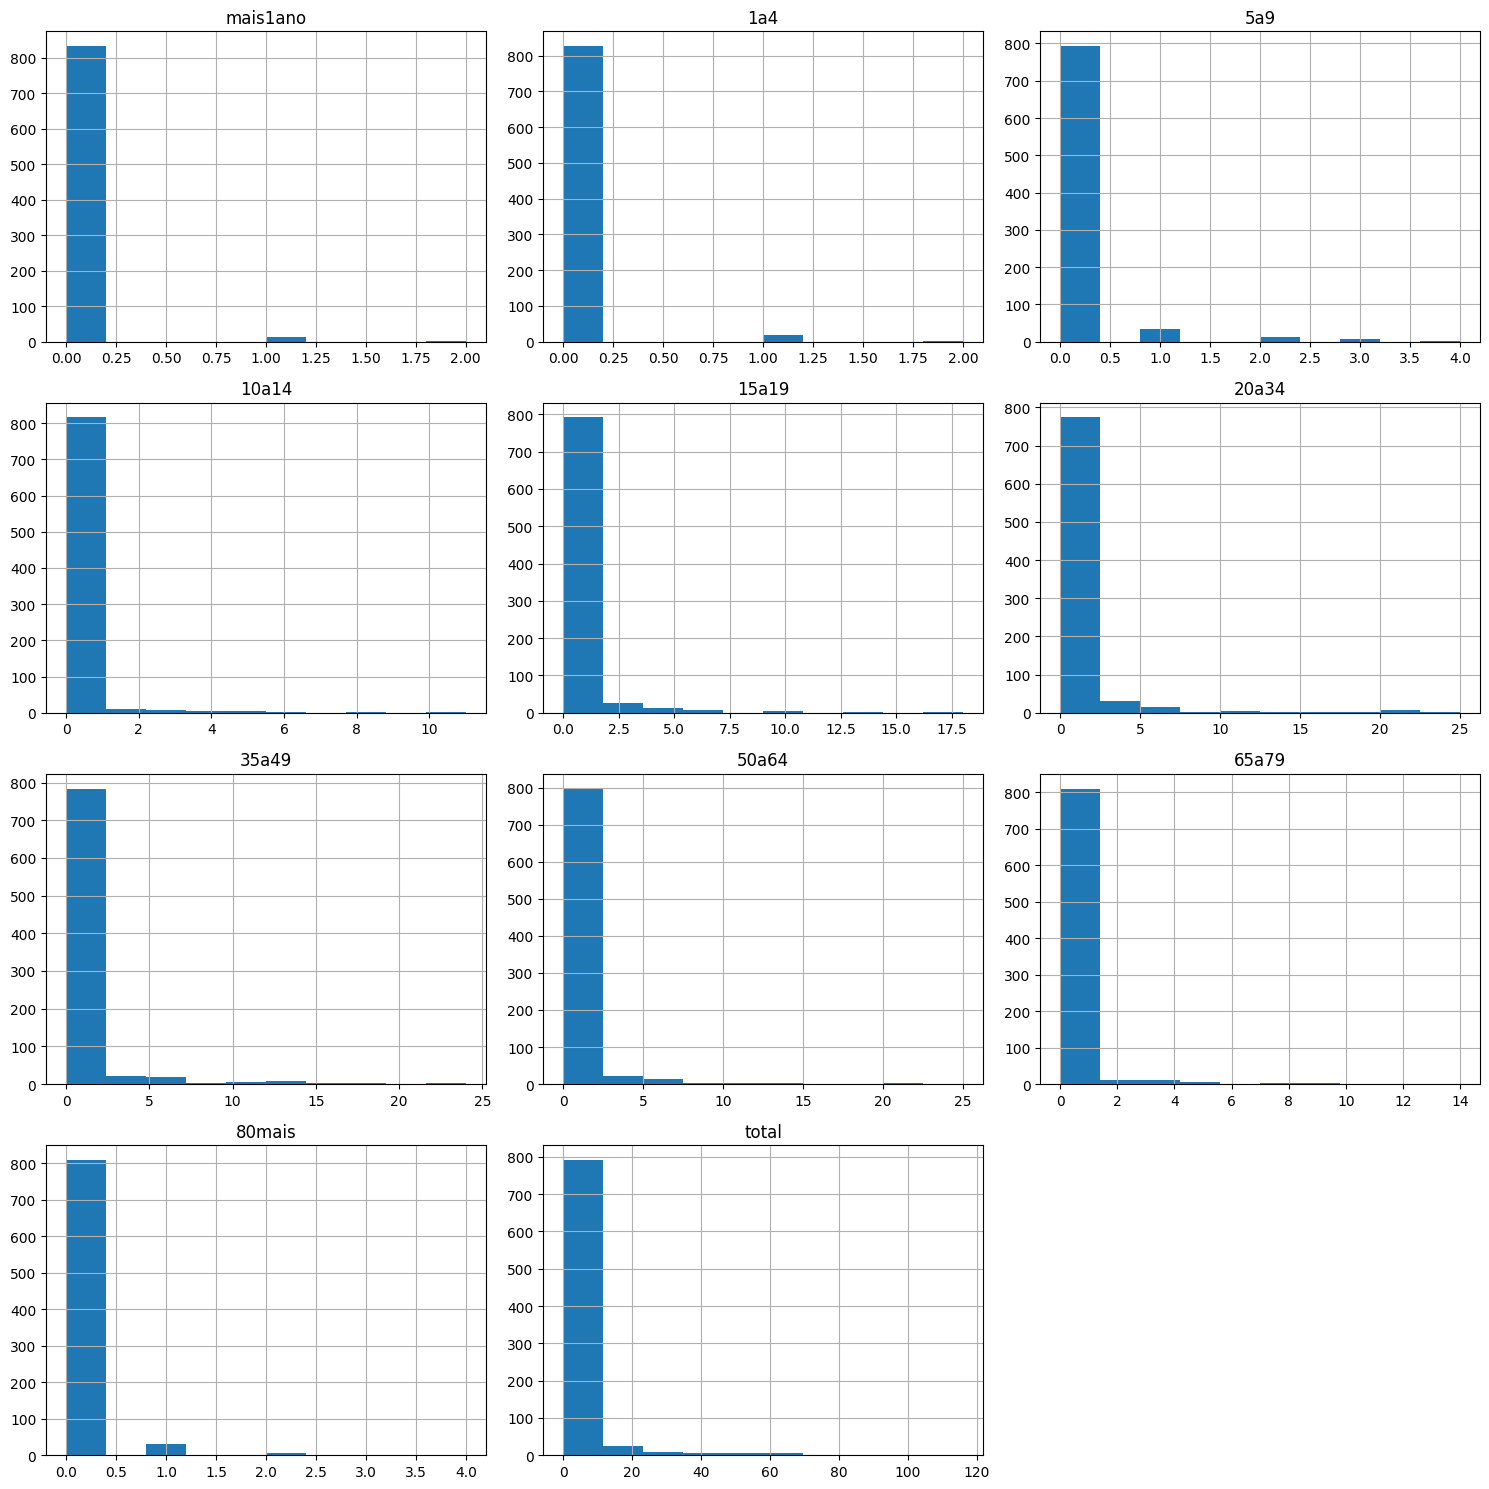

In [12]:
dados.hist(column=nomes_colunas2, figsize=(15, 15))
plt.tight_layout()
plt.show()

In [13]:
faltantes = dados.isnull().sum()
print(faltantes)

mais1ano    0
1a4         0
5a9         0
10a14       0
15a19       0
20a34       0
35a49       0
50a64       0
65a79       0
80mais      0
total       0
dtype: int64


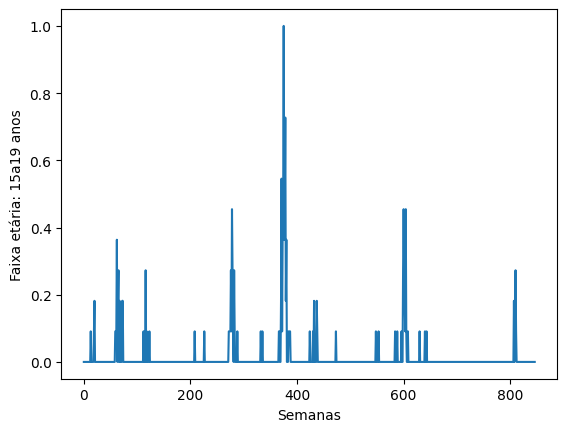

In [14]:
#normalizando os dados para ficar entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))
serie_norm = scaler.fit_transform(serie)

plotFxEtaria(serie_norm[:, 3], '15a19')

In [15]:
#separando os dados de treino e teste (70% treino, 15 teste e 15 validação)
x_treino, x_teste = train_test_split(serie_norm, test_size=0.3, shuffle=False)
#x_teste, x_val = train_test_split(x_teste, test_size=0.5, shuffle=False)

print(x_treino.shape)
print(x_teste.shape)
#print(x_val.shape)


(592, 11)
(255, 11)


In [16]:
#função para criar janelas de tempo(janelas moveis) para o modelo
def janelas(serie, janela):
    x = []
    y = []

    for i in range(len(serie) - janela - 1):
        x.append(serie[i:(i + janela)])
        y.append(serie[(i + janela)])

    return np.array(x), np.array(y)

janela = 4
x_treino, y_treino = janelas(x_treino, janela)
x_teste, y_teste = janelas(x_teste, janela)
x_val, y_val = janelas(x_val, janela)


In [17]:
print(x_treino.shape)
print(y_treino.shape)
print(x_teste.shape)
print(y_teste.shape)
#print(x_val.shape)
#print(y_val.shape)


(587, 4, 11)
(587, 11)
(250, 4, 11)
(250, 11)


In [18]:
'''#ajustando para o formato do lstm (batch, timesteps, features)
x_treino = np.expand_dims(x_treino, axis=3)
x_teste = np.expand_dims(x_teste, axis=3)
x_val = np.expand_dims(x_val, axis=3)
'''



print(x_treino.shape)
print(x_teste.shape)
#print(x_val.shape)


(587, 4, 11)
(250, 4, 11)


In [19]:
function_activation = 'tanh'
inicializador = tensorflow.keras.initializers.LecunNormal(seed=42)

entrada = Input(shape=(x_treino.shape[1], x_treino.shape[2]), name='x_treino')


#camadas LSTM

lstm1 = LSTM(16, activation=function_activation, 
                kernel_initializer=inicializador,
                return_sequences=True)(entrada)

lstm2 = LSTM(32, activation=function_activation,
                kernel_initializer=inicializador,
                return_sequences=True)(lstm1)

lstm3 = LSTM(64, activation=function_activation,
                kernel_initializer=inicializador,
                return_sequences=True)(lstm2)

lstm4 = Bidirectional(LSTM(32, activation=function_activation, 
                kernel_initializer=inicializador,
                return_sequences=False))(lstm3)


#densa para ajustar a saida
densa = Dense(16, activation=function_activation)(lstm4)

#camada de saida
saida = Dense(y_treino.shape[1], activation=function_activation)(densa)

modelo = Model(inputs=entrada, outputs=saida)

2023-06-30 19:33:17.023787: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-30 19:33:17.080676: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-30 19:33:17.080910: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [20]:
modelo.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 x_treino (InputLayer)       [(None, 4, 11)]           0         
                                                                 
 lstm (LSTM)                 (None, 4, 16)             1792      
                                                                 
 lstm_1 (LSTM)               (None, 4, 32)             6272      
                                                                 
 lstm_2 (LSTM)               (None, 4, 64)             24832     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                             

In [21]:
plot_model(modelo, to_file='modelo.png', show_shapes=True, show_layer_names=True, rankdir='LR')
tensorflow.keras.backend.set_epsilon(1)

In [22]:
new_model = False
if (new_model == True):
          
    
        
    es = EarlyStopping(monitor='val_loss', mode='min', patience=100)

    cp = ModelCheckpoint(filepath='modelos/', 
                           save_weights_only=True, 
                           monitor='loss', 
                           mode='min', 
                           save_best_only=True)
    
    #Descomente abaixo e comente o de cima se você estiver usando conjunto de validação
    '''cp = ModelCheckpoint(filepath='modelos/model_pesos.h5', 
                           save_weights_only=True, 
                           monitor='val_loss', 
                           mode='min', 
                           save_best_only=True)'''
    
    opt = Adam(learning_rate=0.0007)
    
    modelo.compile(optimizer = opt, loss = 'mean_squared_error')

    history = modelo.fit(      x_treino, 
                               y_treino, 
                               #validation_data=(x_val, y_val), 
                               epochs=1000, 
                               verbose=1, 
                               callbacks=[cp, es], 
                               batch_size=1, 
                               shuffle=False)
    
    np.save('modelos/history_model.npy', history.history)
    modelo.load_weights('modelos/')
    modelo.save('modelos/modelo.h5')
else:
    modelo = load_model('modelos/modelo.h5')

2023-06-30 19:33:19.786665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-30 19:33:19.788479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-30 19:33:19.791788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

history=np.load('modelos/history_model.npy', allow_pickle='TRUE').item()

sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style('whitegrid')
sns.set_context('paper')

train_metric = history['loss']
valid_metric = history['val_loss']
name_metric = 'mse'

fig = plt.figure()

plt.plot(train_metric, label='TREINO'), 
plt.plot(valid_metric, label='VALIDAÇÃO')
plt.ylabel(name_metric.upper())
plt.xlabel('epoch')
plt.title('Treino vs. Validação usando: ' + name_metric.upper())
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)

plt.show()

In [23]:
#predição
pred = modelo.predict(x_teste)



2023-06-30 19:33:21.388573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-30 19:33:21.391125: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-30 19:33:21.393228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 3s 4ms/step


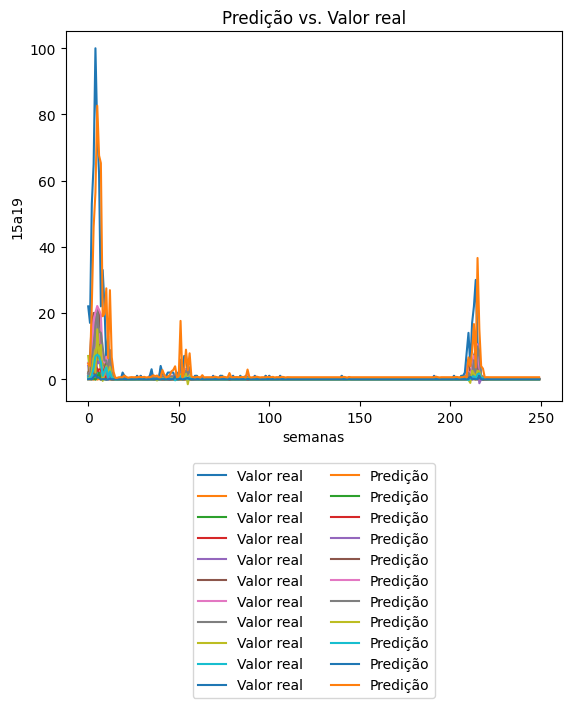

R2 score:  0.1465223374279547


In [24]:

#invertendo a normalização
pred_inv = scaler.inverse_transform(pred)
y_teste_inv = scaler.inverse_transform(y_teste)

#plotando os resultados
plt.plot(y_teste_inv[:, :], label='Valor real')
plt.plot(pred_inv[:, :], label='Predição')
plt.ylabel('15a19')
plt.xlabel('semanas')
plt.title('Predição vs. Valor real')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)

plt.show()

#calculando r2 score
r2 = r2_score(y_teste_inv, pred_inv)
print('R2 score: ', r2)



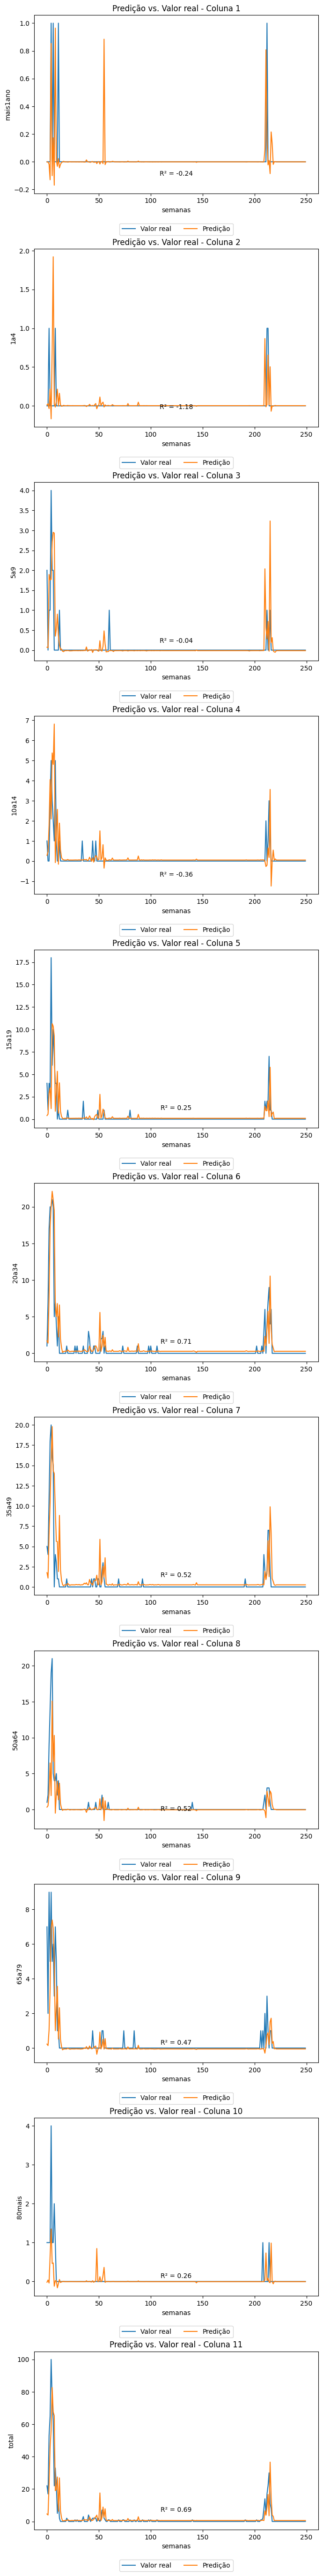

In [25]:
# Obtendo o número de colunas do array
num_colunas = len(y_teste_inv[0])

# Criando subtramas
fig, axs = plt.subplots(num_colunas, 1, figsize=(7, 5*num_colunas))

# Plotando os gráficos separadamente para cada coluna
for i in range(num_colunas):
    axs[i].plot(y_teste_inv[:, i], label='Valor real')
    axs[i].plot(pred_inv[:, i], label='Predição')
    axs[i].set_ylabel(nomes_colunas2[i])
    axs[i].set_xlabel('semanas')
    axs[i].set_title(f'Predição vs. Valor real - Coluna {i+1}')
    axs[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=False, ncol=2)
    
    # Calculando o coeficiente de determinação (R²)
    r2 = r2_score(y_teste_inv[:, i], pred_inv[:, i])
    
    # Adicionando o valor do R² como texto na subtrama
    axs[i].text(0.5, 0.1, f'R² = {r2:.2f}', transform=axs[i].transAxes, ha='center')

# Ajustando o espaçamento entre as subtramas
plt.tight_layout()

# Exibindo os gráficos
plt.show()

In [26]:
pred_inv.shape

(250, 11)

In [27]:
# Calculando o coeficiente de determinação (R²) para a coluna específica
coluna = 10
r2 = r2_score(y_teste_inv[:, coluna], pred_inv[:, coluna])
print('Coeficiente de Determinação (R²) da coluna', coluna, ':', r2)

Coeficiente de Determinação (R²) da coluna 10 : 0.6939915285341951


In [28]:
# Calculando o erro absoluto médio (MAE) para a coluna específica
mae = mean_absolute_error(y_teste_inv[:, coluna], pred_inv[:, coluna])
print('Erro Absoluto Médio (MAE) da coluna', coluna, ':', mae)

# Calculando o erro quadrático médio (MSE) para a coluna específica
mse = mean_squared_error(y_teste_inv[:, coluna], pred_inv[:, coluna])
print('Erro Quadrático Médio (MSE) da coluna', coluna, ':', mse)

# Calculando a raiz quadrada do erro quadrático médio (RMSE) para a coluna específica
rmse = np.sqrt(mean_squared_error(y_teste_inv[:, coluna], pred_inv[:, coluna]))
print('Raiz Quadrada do Erro Quadrático Médio (RMSE) da coluna', coluna, ':', rmse)

# Calculando o erro absoluto médio percentual (MAPE) para a coluna específica
mape = np.mean(np.abs((y_teste_inv[:, coluna] - pred_inv[:, coluna]) / y_teste_inv[:, coluna])) * 100
print('Erro Absoluto Médio Percentual (MAPE) da coluna', coluna, ':', mape)



Erro Absoluto Médio (MAE) da coluna 10 : 2.1165161423683165
Erro Quadrático Médio (MSE) da coluna 10 : 36.790052087059266
Raiz Quadrada do Erro Quadrático Médio (RMSE) da coluna 10 : 6.065480367378933
Erro Absoluto Médio Percentual (MAPE) da coluna 10 : inf


/tmp/ipykernel_23843/409223559.py:14: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_teste_inv[:, coluna] - pred_inv[:, coluna]) / y_teste_inv[:, coluna])) * 100


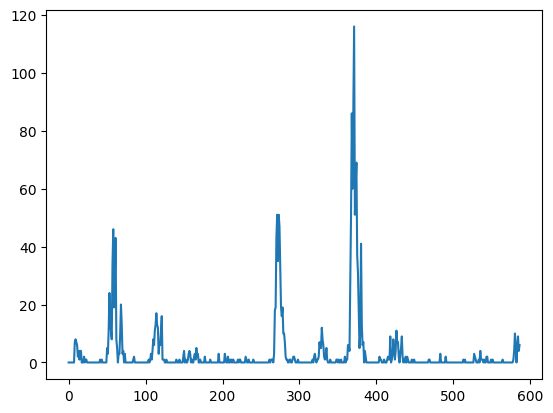

In [29]:
y_treino_inv = scaler.inverse_transform(y_treino)

plt.plot(y_treino_inv[:, 10], label='valor total')

In [30]:
y_treino.shape
y_teste.shape


(250, 11)

In [31]:
y_real_treino = y_treino[:, coluna].flatten()
y_real_treino.shape


(587,)

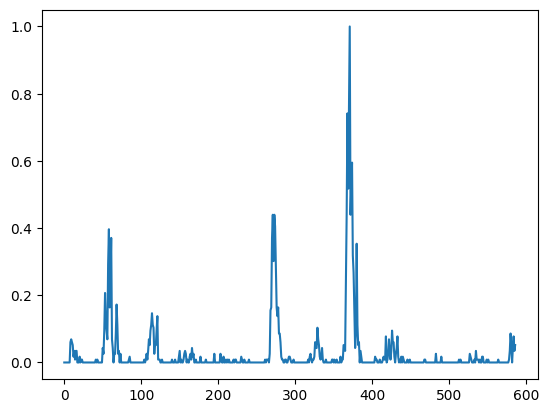

In [32]:
plt.plot(y_real_treino, label='teste')

In [33]:
pred_inv.shape

(250, 11)

In [34]:
pred_inv_flatten = pred_inv[:, coluna].flatten()
pred_inv_flatten.shape

teste = pred


In [35]:
y_real_teste = y_teste[:, coluna].flatten()
y_real_teste.shape

(250,)

In [36]:
#cria um data table com os valores reais e preditos
df_forecast = pd.DataFrame()
df_forecast['y_true'] = np.hstack((y_real_treino, y_real_teste))
df_forecast['y_hat'] = np.hstack((y_real_treino, pred_inv_flatten))

df_forecast.shape

(837, 2)

In [37]:
df_forecast.head(50)

,y_true,y_hat
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
5,0.000000,0.000000
6,0.000000,0.000000
7,0.000000,0.000000
8,0.060345,0.060345
9,0.068966,0.068966


In [1]:
#toca um som para avisar que terminou de executar
pygame.mixer.init()
arquivo_mp3 = 'msc/clash.mp3'
pygame.mixer.music.load(arquivo_mp3)
pygame.mixer.music.play()

while pygame.mixer.music.get_busy():
    continue
    
print('FINALMENTE')

NameError: name 'pygame' is not defined